# 使用cupy进行仿射变换
这里我们使用[cupy](https://cupy.dev)应用仿射变换。

In [1]:
from skimage.io import imread, imshow

import cupy
from cupyx.scipy import ndimage as ndi

(192, 256, 256)

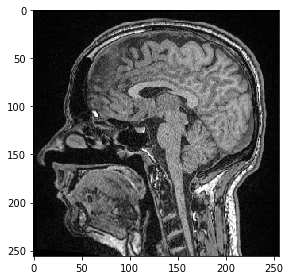

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

imshow(image[100])
image.shape

类似于scipy中的变换，cupy也使用变换矩阵来描述变换。

In [3]:
import numpy as np

# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])

在我们可以对图像应用cupy操作之前，我们需要将其发送到GPU内存。我们会收到一个指向GPU上图像的句柄，这个句柄不能使用`imshow`显示。

In [4]:
cuda_image = cupy.asarray(image)
cuda_image.shape

(192, 256, 256)

类似于scipy中的仿射变换，在我们可以写入之前，我们需要创建一个具有定义形状的输出图像，其大小是原始图像的两倍。

In [5]:
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
cuda_scaled = cupy.ndarray(output_shape)
print(cuda_scaled.shape)

(384, 512, 512)


In [6]:
r = ndi.affine_transform(cuda_image, cupy.asarray(matrix), output=cuda_scaled, output_shape=output_shape)

在我们可以查看结果图像之前，我们需要将其从GPU内存传输到CPU内存

In [7]:
result = cupy.asnumpy(cuda_scaled)
result.shape

(384, 512, 512)

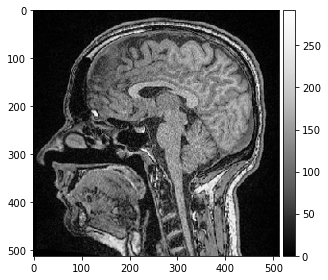

In [8]:
imshow(result[200], cmap="Greys_r", vmin=0)